In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap.umap_ as umap

In [3]:
np.set_printoptions(threshold=np. inf)
pd.options.display.max_rows = 4000

In [3]:
df = pd.read_csv("QUFA_Healthdata.csv", engine="python")

In [4]:
sub_col = ["sex", "age", "cva", "fcvayn", "sd_idr2", "exerfq", "packyear"]

In [5]:
df = df[sub_col]

In [8]:
print(df.isnull().sum())

sex         0
age         0
cva         0
fcvayn      0
sd_idr2     0
exerfq      0
packyear    0
dtype: int64


In [7]:
df["packyear"] = df["packyear"].replace(np.nan, 0)
df["sd_idr2"] = df["sd_idr2"].replace(np.nan, 0)
df["exerfq"] = df["exerfq"].replace(np.nan, 0)

In [9]:
print(df.shape)

(101500, 7)


In [10]:
df.head()

,sex,age,cva,fcvayn,sd_idr2,exerfq,packyear
0,2,29,1,1,0.0,3.0,0.0
1,2,37,1,1,2.0,0.0,0.0
2,2,32,1,1,1.0,0.0,0.0
3,1,20,1,1,1.0,0.0,99.0
4,1,29,1,1,0.0,0.0,0.0


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import umap.umap_ as umap

In [13]:
tsne = TSNE(n_components=2).fit_transform(df.iloc[:, 1:].values)
umap = umap.UMAP().fit_transform(df.iloc[:,1:].values)

/home/yjjeong/anaconda3/envs/yj_ds_py38/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [14]:
df["umap_sex_1"] = umap[:, 0]
df["umap_sex_2"] = umap[:, 1]
df["tsne_sex_1"] = tsne[:, 0]
df["tsne_sex_2"] = tsne[:, 1]

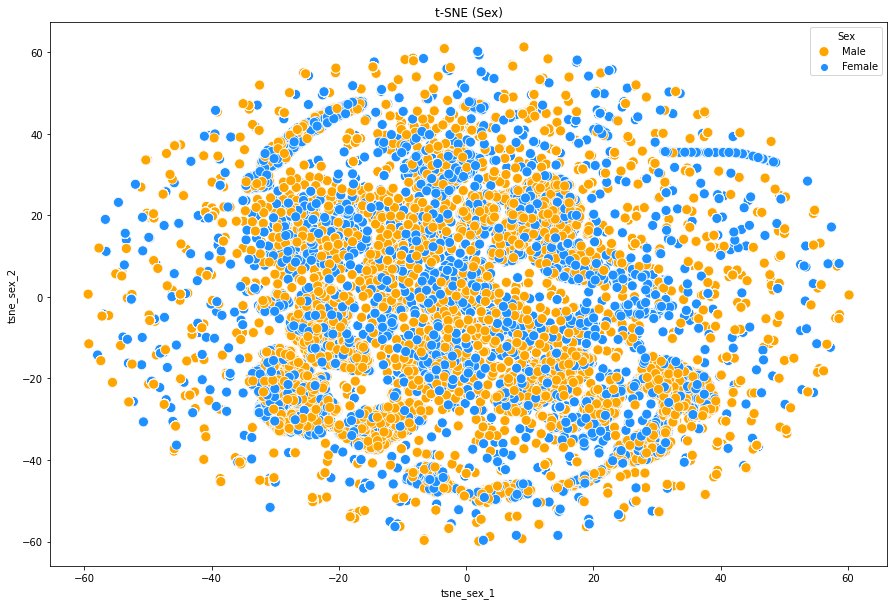

In [15]:
plt.figure(figsize=(15,10))
color_dict = dict({1 : "dodgerblue", 2 : "orange"})
g = sns.scatterplot(x="tsne_sex_1", y="tsne_sex_2", hue="sex", s=100, palette=color_dict, data=df, legend=True)
plt.title("t-SNE (Sex)")
plt.legend(title="Sex", labels=["Male", "Female"])
plt.show(g)

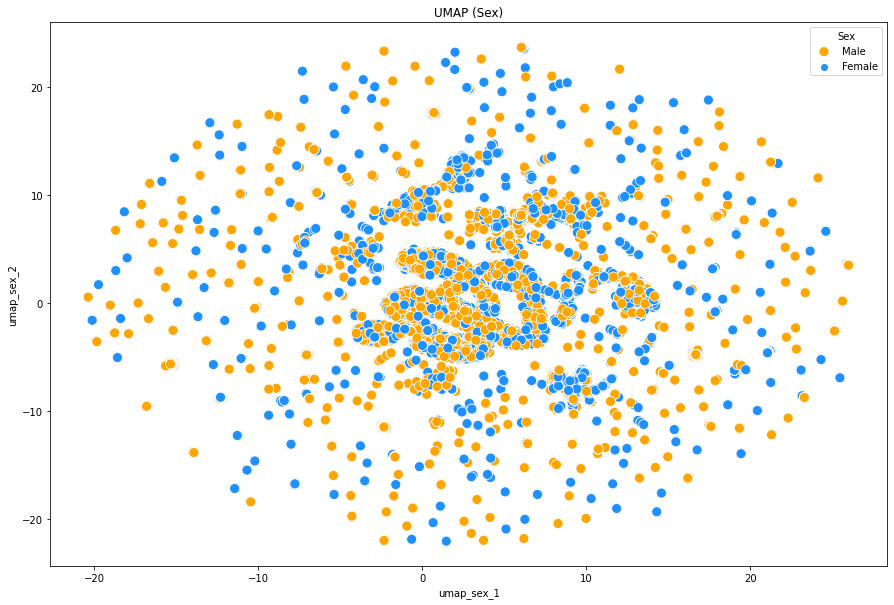

In [16]:
plt.figure(figsize=(15,10))
color_dict = dict({1 : "dodgerblue", 2 : "orange"})
g = sns.scatterplot(x="umap_sex_1", y="umap_sex_2", hue="sex", s=100, palette=color_dict, data=df, legend=True)
plt.title("UMAP (Sex)")
plt.legend(title="Sex", labels=["Male", "Female"])
plt.show(g)

# Before vs. After

In [4]:
train = pd.read_csv("train.csv")
fair = pd.read_csv("fair.csv")

In [5]:
train.head()

,sex,age,cva,fcvayn,packyear,sd_idr2,exerfq
0,1,15,0,0,0,0,3
1,1,23,0,0,0,2,0
2,1,18,0,0,0,1,0
3,0,15,0,0,0,0,0
4,1,23,0,0,0,2,0


In [6]:
fair.head()

,sex,age,cva,fcvayn,packyear,sd_idr2,exerfq
0,0,64,1,0,0,5,0
1,0,64,0,1,1340,0,0
2,0,64,0,1,952,0,0
3,0,64,0,1,444,0,12
4,0,64,0,1,105,0,0


In [7]:
train["label"] = 0 # before
fair["label"] = 1 # after

In [8]:
merged = pd.concat([train, fair], ignore_index=True)

In [9]:
merged.head()

,sex,age,cva,fcvayn,packyear,sd_idr2,exerfq,label
0,1,15,0,0,0,0,3,0
1,1,23,0,0,0,2,0,0
2,1,18,0,0,0,1,0,0
3,0,15,0,0,0,0,0,0
4,1,23,0,0,0,2,0,0


In [10]:
merged["Group"] = None

In [11]:
for idx, row in merged.iterrows():
    if row["sex"] == 0 and row["label"] == 0:
        merged.iloc[idx, -1] = 1 # Male / Before
    elif row["sex"] == 1 and row["label"] == 0:
        merged.iloc[idx, -1] = 2 # Female / Before
    elif row["sex"] == 0 and row["label"] == 1:
        merged.iloc[idx, -1] = 3 # Male / After
    else:
        merged.iloc[idx, -1] = 4 # Female / After

In [12]:
merged.head()

,sex,age,cva,fcvayn,packyear,sd_idr2,exerfq,label,Group
0,1,15,0,0,0,0,3,0,2
1,1,23,0,0,0,2,0,0,2
2,1,18,0,0,0,1,0,0,2
3,0,15,0,0,0,0,0,0,1
4,1,23,0,0,0,2,0,0,2


In [13]:
tsne = TSNE(n_components=2).fit_transform(merged.iloc[:, 1:-2].values)
umap = umap.UMAP().fit_transform(merged.iloc[:,1:-2].values)

/home/yjjeong/anaconda3/envs/yj_ds_py38/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [14]:
merged["umap_sex_1"] = umap[:, 0]
merged["umap_sex_2"] = umap[:, 1]
merged["tsne_sex_1"] = tsne[:, 0]
merged["tsne_sex_2"] = tsne[:, 1]

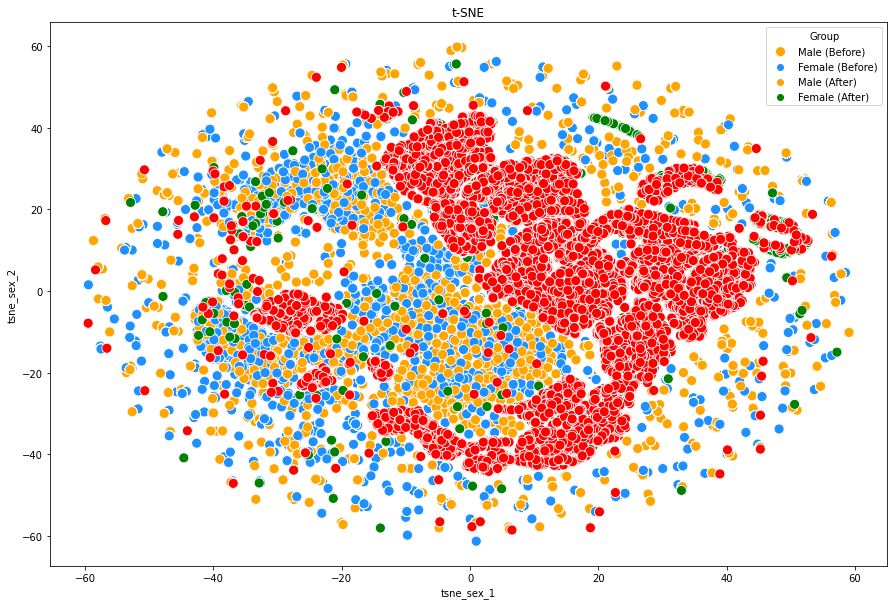

In [49]:
plt.figure(figsize=(15,10))
color_dict = dict({1 : "dodgerblue", 2 : "orange", 3 : "green", 4 : "red"})
g = sns.scatterplot(x="tsne_sex_1", y="tsne_sex_2", hue="Group", s=100, palette=color_dict, data=merged, legend=True)
plt.title("t-SNE")
plt.legend(title="Group", labels=["Male (Before)", "Female (Before)", "Male (After)", "Female (After)"])
plt.show(g)

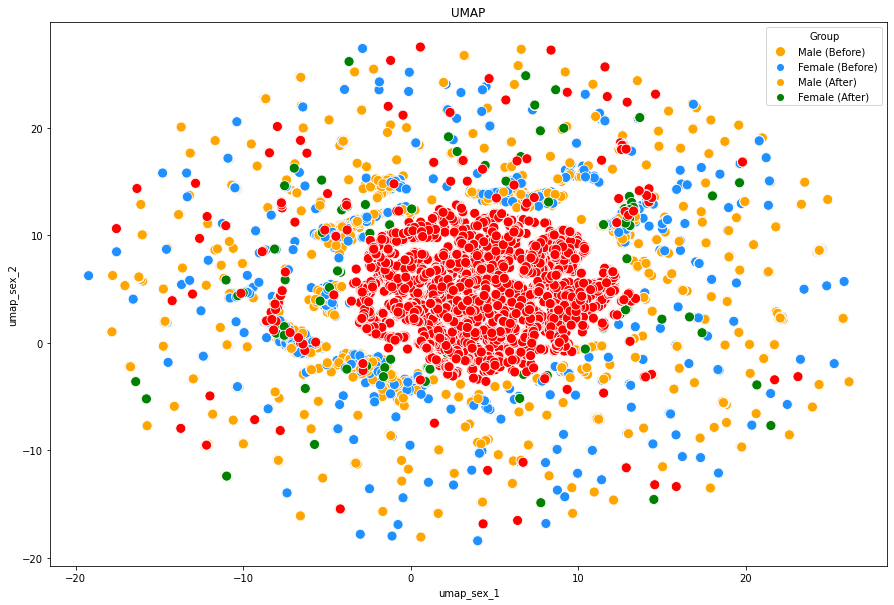

In [50]:
plt.figure(figsize=(15,10))
color_dict = dict({1 : "dodgerblue", 2 : "orange", 3 : "green", 4 : "red"})
g = sns.scatterplot(x="umap_sex_1", y="umap_sex_2", hue="Group", s=100, palette=color_dict, data=merged, legend=True)
plt.title("UMAP")
plt.legend(title="Group", labels=["Male (Before)", "Female (Before)", "Male (After)", "Female (After)"])
plt.show(g)

In [15]:
before = merged.loc[merged["label"] == 0]
after = merged.loc[merged["label"] == 1]

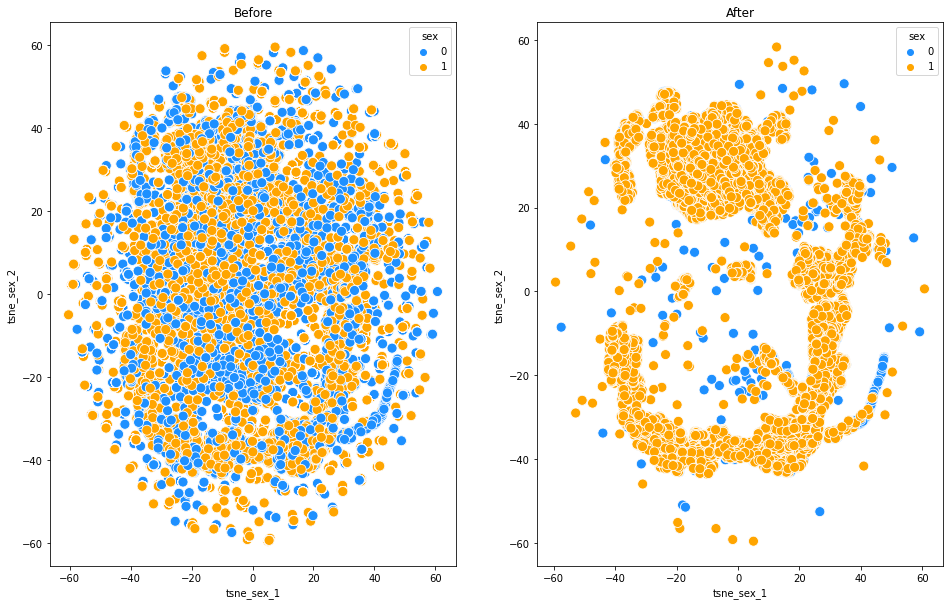

In [22]:
fig = plt.figure(figsize=(16, 10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

left_color_dict = dict({0 : "dodgerblue", 1 : "orange"})
sns.scatterplot(x="tsne_sex_1", y="tsne_sex_2", hue="sex", s=100, palette=left_color_dict, data=before, legend=True, ax=ax1)
ax1.set_title("Before")

right_color_dict = dict({0 : "dodgerblue", 1 : "orange"})
sns.scatterplot(x="tsne_sex_1", y="tsne_sex_2", hue="sex", s=100, palette=right_color_dict, data=after, legend=True, ax=ax2)
ax2.set_title("After")

plt.show()

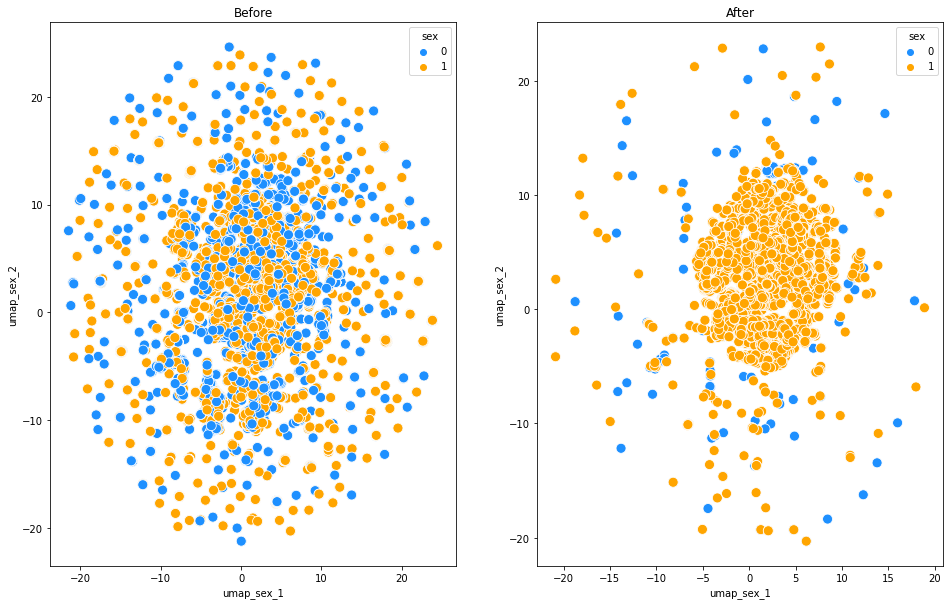

In [23]:
fig = plt.figure(figsize=(16, 10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

left_color_dict = dict({0 : "dodgerblue", 1 : "orange"})
sns.scatterplot(x="umap_sex_1", y="umap_sex_2", hue="sex", s=100, palette=left_color_dict, data=before, legend=True, ax=ax1)
ax1.set_title("Before")

right_color_dict = dict({0 : "dodgerblue", 1 : "orange"})
sns.scatterplot(x="umap_sex_1", y="umap_sex_2", hue="sex", s=100, palette=right_color_dict, data=after, legend=True, ax=ax2)
ax2.set_title("After")

plt.show()